**Imports**

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, MinMaxScaler
from torch.utils.data import DataLoader, Dataset, random_split
import torchvision.transforms as T
import torch
import torch.nn as nn

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

**Overview of data**

In [18]:
train = pd.read_csv('train.csv')

In [19]:
train

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [20]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [21]:
train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [22]:
train.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

**Drop 'Name' column, because is useless**

In [23]:
train = train.drop('Name', axis=1)

**Fill numerical null values with mean values**

In [24]:
num_columns = train.select_dtypes('number').columns

for x in num_columns:
    train[x] = train[x].fillna(np.mean(train[x]))

train.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age               0
VIP             203
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Transported       0
dtype: int64

**Categorical null value distribution**

In [25]:
train_copy = train.copy()
train_copy = train_copy.dropna() #dropna to be able to split column 'Cabin' to 'P' and 'S'

train_copy['Cabin'] = ['Port' if x.split('/')[-1]=='P' else 'Starboard' for x in train_copy['Cabin']]

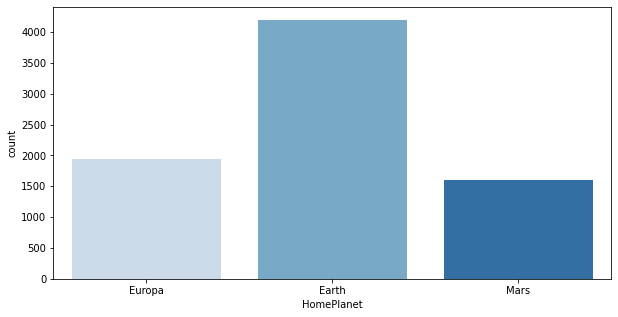

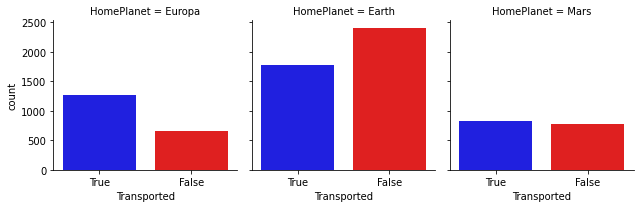

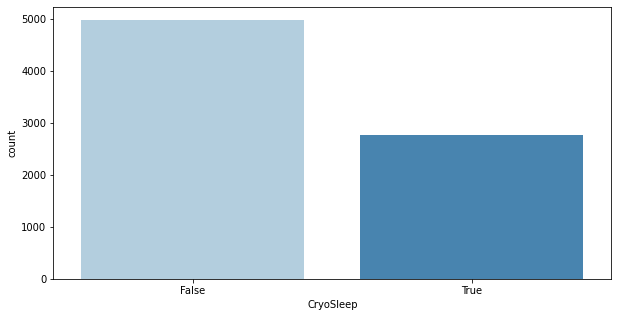

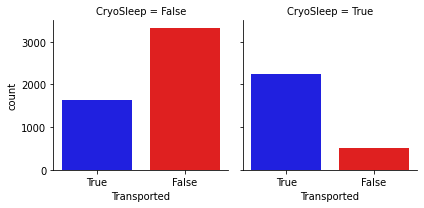

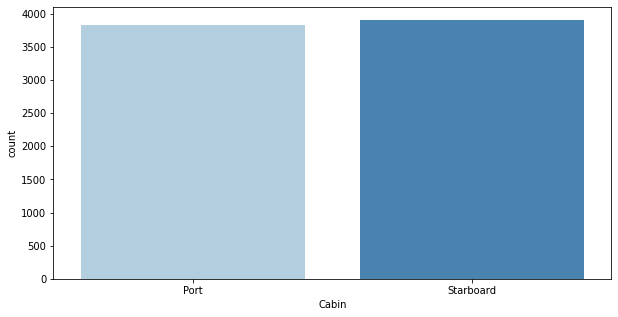

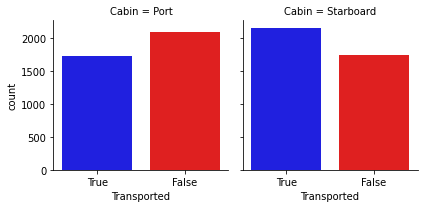

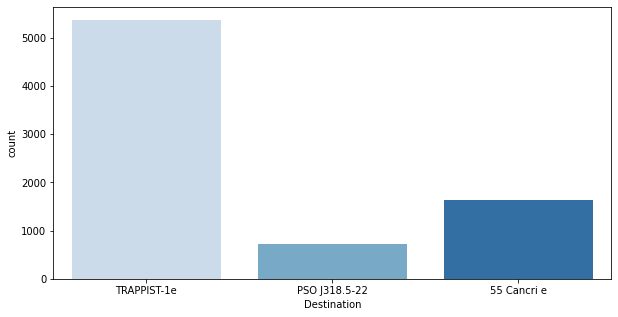

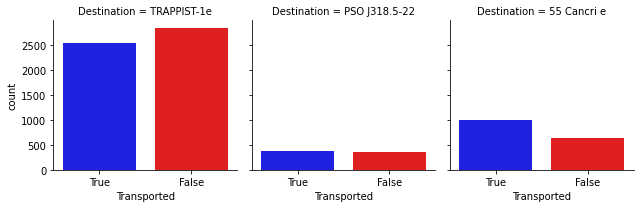

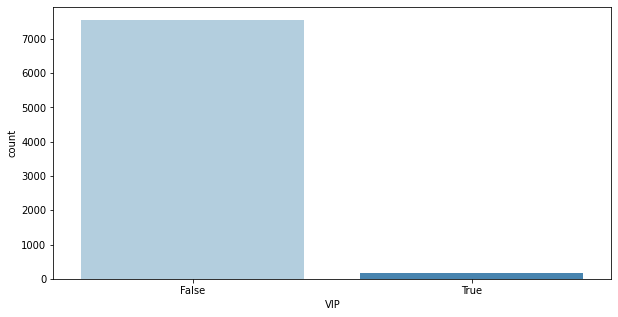

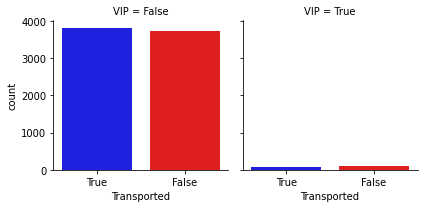

In [26]:
object_columns = train_copy.select_dtypes('O').columns[1:]

def count_chart(column, df):
    plt.figure(figsize=(10,5))
    sns.countplot(x=column, data=df, palette='Blues')
    plt.show()
    
def corr_chart(column, df):
    warnings.filterwarnings("ignore")
    sns.set_palette("pastel")
    color = ['blue', 'red']
    
    plot = sns.FacetGrid(df, col=column)
    plot.map(sns.countplot, 'Transported', palette=color, order=([True, False]))
    
    plt.show()
    
for x in object_columns:
    count_chart(x, train_copy)
    corr_chart(x, train_copy)

**Fill null values based on charts**

In [27]:
def fill_cat(column, true_value, false_value, df):
    values = []
    for x, y in df[[column, 'Transported']].values:
        if pd.isnull(x):
            if y:
                values.append(true_value)
            else:
                values.append(false_value)
        else:
            values.append(x)
        
    return values

In [28]:
train['HomePlanet'] = fill_cat('HomePlanet', 'Europa', 'Earth', train)
train['CryoSleep'] = fill_cat('CryoSleep', True, False, train)
train['Cabin'] = fill_cat('Cabin', 'Starboard', 'Port', train)
train['Destination'] = fill_cat('Destination', '55 Cancri e', 'TRAPPIST-1e', train)
train['VIP'] = fill_cat('VIP', False, True, train)

train.isnull().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
dtype: int64

In [29]:
train

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,False


**Split values of 'Cabin' column**

In [30]:
train['Deck'] = [x.split("/")[0][0] for x in train['Cabin']]

num =[]
for x in train['Cabin']:
    try:
       num.append(int(x.split('/')[1]))
    except IndexError:
        num.append(0)

train['Num'] = num
train['Cabin'] = ['Port' if x.split('/')[-1]=='P' else 'Starboard' for x in train['Cabin']]

In [31]:
train

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Num
0,0001_01,Europa,False,Port,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,B,0
1,0002_01,Earth,False,Starboard,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,F,0
2,0003_01,Europa,False,Starboard,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,A,0
3,0003_02,Europa,False,Starboard,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,A,0
4,0004_01,Earth,False,Starboard,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,F,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,Port,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False,A,98
8689,9278_01,Earth,True,Starboard,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,False,G,1499
8690,9279_01,Earth,False,Starboard,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,True,G,1500
8691,9280_01,Europa,False,Starboard,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,False,E,608


**Distribution of target**

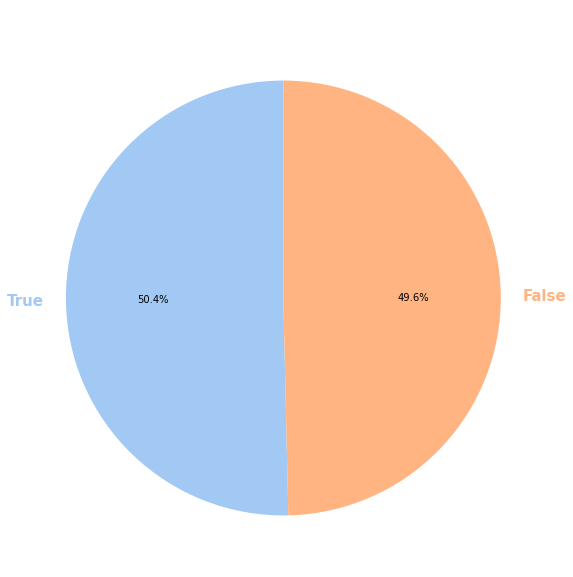

In [32]:
distribution_target = train['Transported'].value_counts()

fig, ax = plt.subplots(figsize=(20, 10))
labels=['True', 'False']

patches, texts, pcts = ax.pie(distribution_target, labels=labels, autopct='%.1f%%', startangle=90)

for i, patch in enumerate(patches):
  texts[i].set_color(patch.get_facecolor())

plt.setp(texts, fontweight=1000, fontsize=15)
ax.set_title('Distribution of target', fontsize=18, color='white')

plt.show()

**Outliers in data and feature engineering**

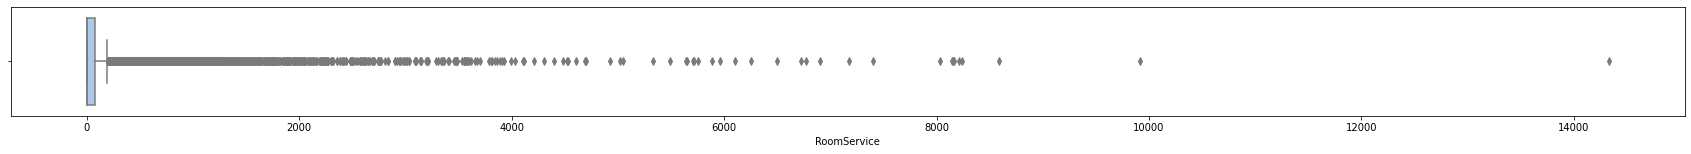

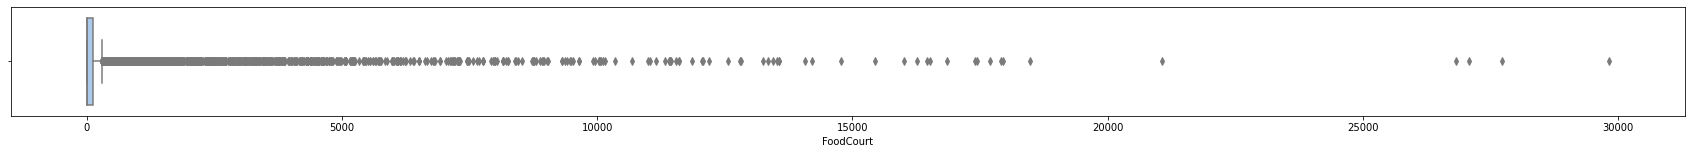

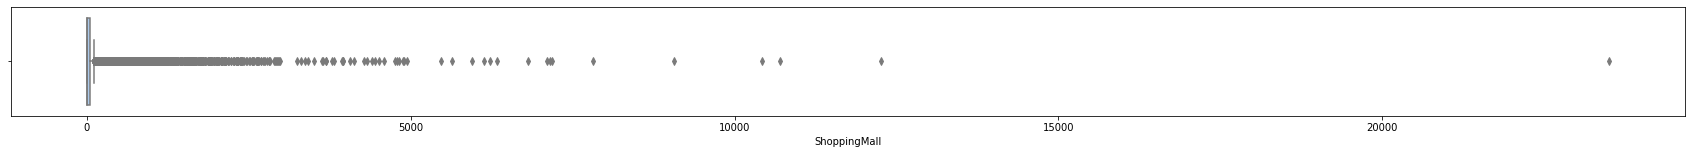

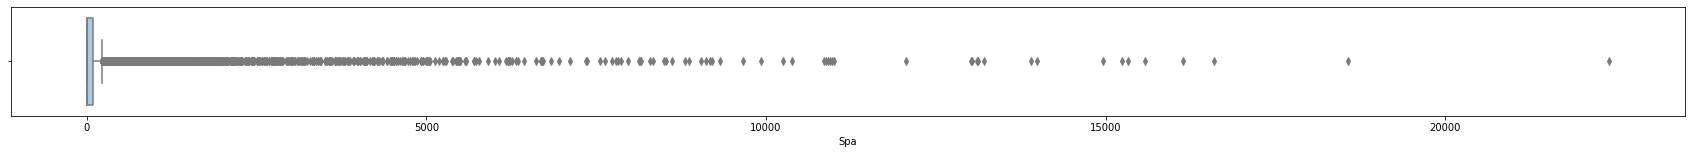

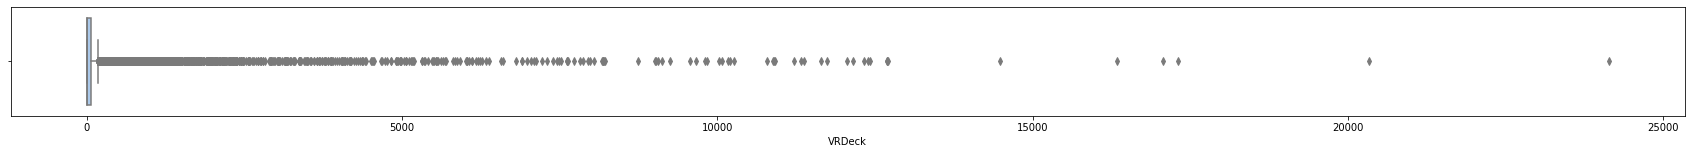

In [33]:
for column in num_columns[1:]:
    plt.figure(figsize=(30, 2))
    sns.boxplot(data=train, x=column)
    plt.show()

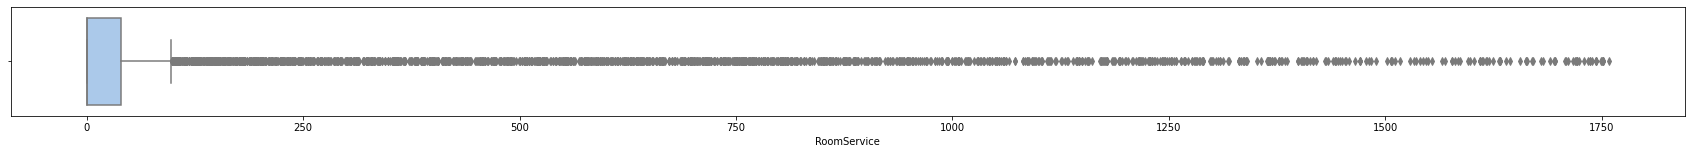

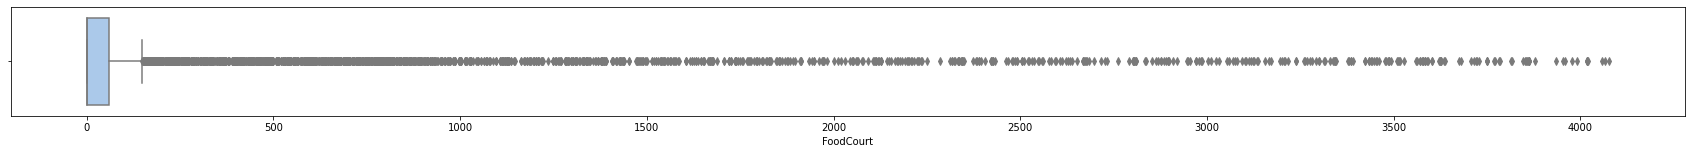

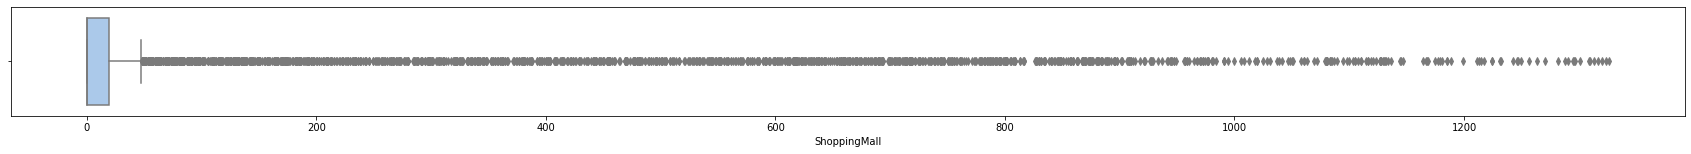

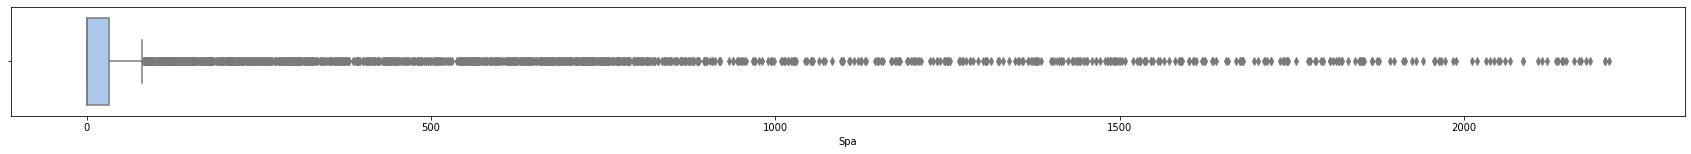

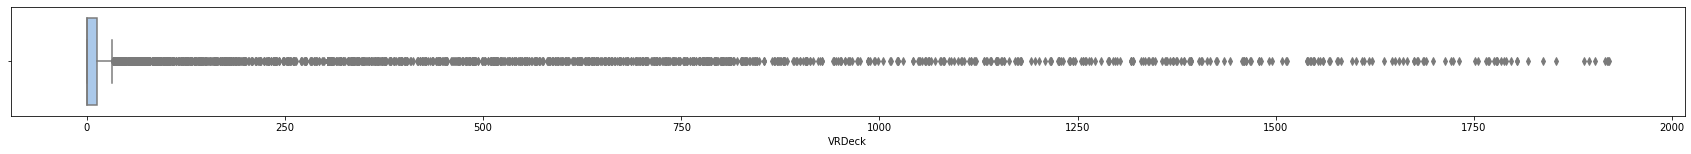

In [34]:
def remove_outliers(column):
    quan = train[column].quantile(0.97)
    return train[train[column] < quan]

for column in num_columns[1:]:
    train = remove_outliers(column)
    plt.figure(figsize=(30, 2))
    sns.boxplot(data=train, x=column)
    plt.show()

<AxesSubplot:>

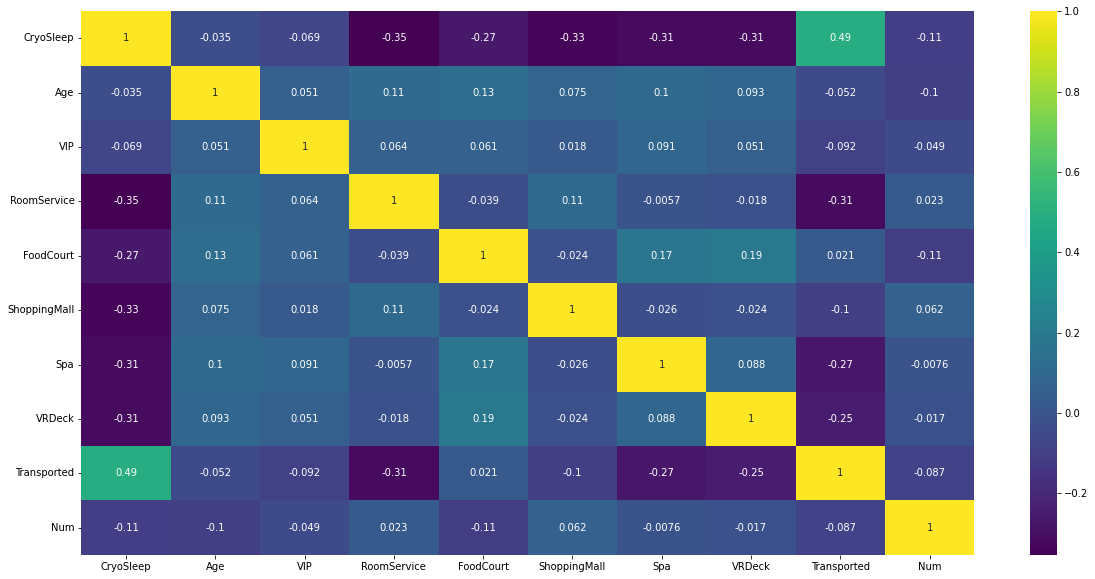

In [35]:
plt.figure(figsize=(20, 10))
sns.heatmap(train.corr(), annot=True, cmap='viridis')

**Data processing**

In [36]:
ordenc = OrdinalEncoder()

train['Deck'] = ordenc.fit_transform(np.array(train['Deck']).reshape(-1, 1))

In [37]:
num_columns = train.select_dtypes('number').columns
scaler = StandardScaler()
normalize = MinMaxScaler()

for column in num_columns:
    data = np.array(train[column]).reshape(-1, 1)
    train[column] = scaler.fit_transform(data)
    train[column] = normalize.fit_transform(data)

In [38]:
train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Deck,Num
count,7464.000000,7464.000000,7464.000000,7464.000000,7464.000000,7464.000000,7464.000000,7464.000000
mean,0.354509,0.079947,0.046990,0.075998,0.056984,0.059834,0.513651,0.330378
std,0.183077,0.183735,0.134312,0.181008,0.146233,0.152612,0.189166,0.272226
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.240506,0.000000,0.000000,0.000000,0.000000,0.000000,0.444444,0.094377
50%,0.329114,0.000000,0.000000,0.000000,0.000000,0.000000,0.555556,0.253960
75%,0.468354,0.022753,0.004181,0.015837,0.009502,0.006771,0.666667,0.545407
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [39]:
train.index = [i for i in range(len(train))]

In [40]:
hotenc = OneHotEncoder()

def encoder(column, df):
    encode = hotenc.fit_transform(np.array(df[column]).reshape(-1, 1)).toarray()
    df1 = pd.DataFrame(encode, columns=[f'{column}_{i}' for i in range(len(pd.DataFrame(encode).columns))])
    df2 = df.join(df1)
    df3 = df2.drop(column, axis=1)
    return df3

In [41]:
train = encoder('HomePlanet', train)
train = encoder('Cabin', train)
train = encoder('Destination', train)

In [42]:
train.dtypes

PassengerId       object
CryoSleep           bool
Age              float64
VIP                 bool
RoomService      float64
FoodCourt        float64
ShoppingMall     float64
Spa              float64
VRDeck           float64
Transported         bool
Deck             float64
Num              float64
HomePlanet_0     float64
HomePlanet_1     float64
HomePlanet_2     float64
Cabin_0          float64
Cabin_1          float64
Destination_0    float64
Destination_1    float64
Destination_2    float64
dtype: object

In [238]:
x = np.array(train.drop(['PassengerId', 'Transported'], axis=1), dtype=np.float32)
y = np.array(train['Transported'], dtype=np.float32)

print(f'X shape: {x.shape}')

X shape: (7464, 18)


In [239]:
class LoadData(Dataset):
    def __init__(self, x, y):
        self.x = x
        self.y = y
    
    def __len__(self):
        return len(self.x)
    
    def __getitem__(self, idx):
        x = torch.Tensor(self.x)
        y = torch.Tensor(self.y)
        
        x = x[idx]
        y = y[idx]
        
        return x, y

In [240]:
batch = 64
train_length = int(len(train)*0.8) #80%
valid_length = int(len(train) - train_length) #20%

set = LoadData(x, y)

trainset, validset = random_split(set, (train_length, valid_length))

train_loader = DataLoader(trainset, batch_size=batch, shuffle=False, pin_memory=True)
valid_loader = DataLoader(validset, batch_size=batch, shuffle=False, pin_memory=True)

**Model**

In [241]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(18, 64),
            nn.ReLU(),
            nn.Dropout(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Dropout(),
            nn.Linear(128, 256),
            nn.ReLU(),
            nn.Dropout(),
            nn.Linear(256, 512),
            nn.ReLU(),
            nn.Dropout(),
            nn.Linear(512, 2)
        )
        
    def forward(self, x):
        return self.model(x)

In [242]:
model = Net().to(device)

learning_rate = 0.0003
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=0.00000001)
criterion = nn.CrossEntropyLoss().to(device)

In [243]:
epochs = 300
train_losses = []
valid_losses = []

for epoch in range(epochs):
    valid_loss = 0.0
    train_loss = 0.0

    for i, (x, y) in enumerate(train_loader):
        x, y = x.to(device), y.type(torch.LongTensor).to(device)
        output = model(x)
        
        optimizer.zero_grad()
        
        loss = criterion(output, y)
        loss.backward()
        
        optimizer.step()
        
        train_loss += loss.item()  

    for i, (x, y) in enumerate(valid_loader):
        x, y = x.to(device), y.type(torch.LongTensor).to(device)
         
        output = model(x)

        loss = criterion(output, y)
        valid_loss += loss.item()

    train_losses.append(train_loss/len(train_loader))
    valid_losses.append(valid_loss/len(valid_loader))

    print(f'Epoch {epoch+1}/{epochs}:')
    print(f'Training loss: {train_loss / len(train_loader):.3f} | Valid loss: {valid_loss / len(valid_loader):.3f}')
    print("")

print(f'Training finished!')

Epoch 1/300:
Training loss: 0.666 | Valid loss: 0.582

Epoch 2/300:
Training loss: 0.559 | Valid loss: 0.529

Epoch 3/300:
Training loss: 0.537 | Valid loss: 0.521

Epoch 4/300:
Training loss: 0.525 | Valid loss: 0.504

Epoch 5/300:
Training loss: 0.517 | Valid loss: 0.502

Epoch 6/300:
Training loss: 0.508 | Valid loss: 0.494

Epoch 7/300:
Training loss: 0.500 | Valid loss: 0.484

Epoch 8/300:
Training loss: 0.496 | Valid loss: 0.479

Epoch 9/300:
Training loss: 0.490 | Valid loss: 0.486

Epoch 10/300:
Training loss: 0.480 | Valid loss: 0.483

Epoch 11/300:
Training loss: 0.482 | Valid loss: 0.473

Epoch 12/300:
Training loss: 0.476 | Valid loss: 0.483

Epoch 13/300:
Training loss: 0.475 | Valid loss: 0.466

Epoch 14/300:
Training loss: 0.471 | Valid loss: 0.466

Epoch 15/300:
Training loss: 0.469 | Valid loss: 0.463

Epoch 16/300:
Training loss: 0.471 | Valid loss: 0.456

Epoch 17/300:
Training loss: 0.470 | Valid loss: 0.458

Epoch 18/300:
Training loss: 0.461 | Valid loss: 0.454

E

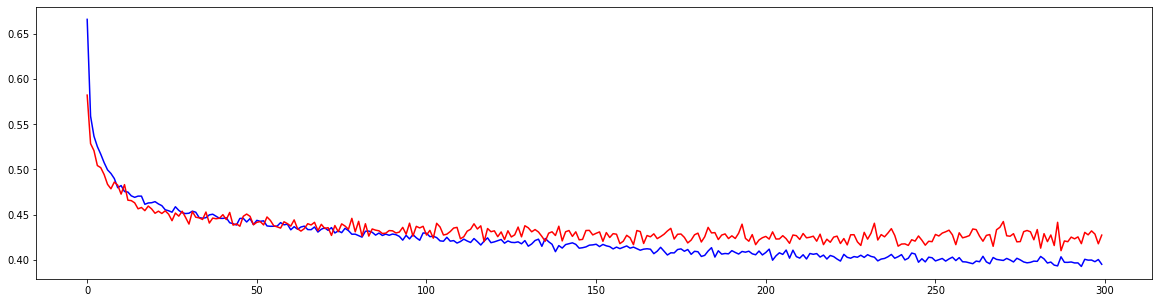

In [244]:
plt.figure(figsize=(20, 5))
sns.lineplot(x=np.arange(0, epochs), y=train_losses, color='blue')
sns.lineplot(x=np.arange(0, epochs),y=valid_losses, color='red')
plt.show()

Little overfitting

**Test data processing**

In [245]:
test = pd.read_csv('test.csv')

test = test.drop('Name', axis=1)

test_num_columns = test.select_dtypes('number').columns

for x in test_num_columns:
    test[x] = test[x].fillna(np.mean(test[x]))

test['HomePlanet'] = test['HomePlanet'].fillna('Europa')
test['CryoSleep'] = test['CryoSleep'].fillna(True)
test['Cabin'] = test['Cabin'].fillna('0/0/S')
test['Destination'] = test['Destination'].fillna('55 Cancri e')
test['VIP'] = test['VIP'].fillna(True)

test['Deck'] = [x.split("/")[0][0] for x in test['Cabin']]

num =[]
for x in test['Cabin']:
    try:
       num.append(int(x.split('/')[1]))
    except IndexError:
        num.append(0)

test['Num'] = num
test['Cabin'] = ['Port' if x.split('/')[-1]=='P' else 'Starboard' for x in test['Cabin']]

test['Deck'] = ordenc.fit_transform(np.array(test['Deck']).reshape(-1, 1))

test.index = [i for i in range(len(test))]

test_num_columns = test.select_dtypes('number').columns
scaler = StandardScaler()
normalize = MinMaxScaler()

for column in test_num_columns:
    data = np.array(test[column]).reshape(-1, 1)
    test[column] = scaler.fit_transform(data)
    test[column] = normalize.fit_transform(data)

test = encoder('HomePlanet', test)
test = encoder('Cabin', test)
test = encoder('Destination', test)

**Evaluation**

In [246]:
class testData(Dataset):
    def __init__(self, x):
        self.x = x
    
    def __len__(self):
        return len(self.x)

    def __getitem__(self, index):
        return self.x[index]
    

test_x = np.array(test.iloc[:, 1:], dtype=np.float32)
test_data = testData(torch.tensor(test_x, dtype=torch.float32))
test_loader = DataLoader(test_data, batch_size=1)

In [247]:
model.eval()

predictions = []
with torch.no_grad():
    for x in test_data:
        x = x.to(device)
        output = model(x)
        _, predicted = torch.max(output.data, 0)
        predictions.append(predicted)

In [248]:
passenger_IDs = pd.read_csv("sample_submission.csv")[["PassengerId"]].values

my_submission = {'PassengerId': passenger_IDs.ravel(), 'Transported': [bool(x) for x in predictions]}
my_submission = pd.DataFrame(my_submission).set_index(['PassengerId'])
my_submission.head(10)

,Transported
PassengerId,
0013_01,True
0018_01,False
0019_01,True
0021_01,True
0023_01,False
0027_01,False
0029_01,True
0032_01,True
0032_02,True


In [251]:
# my_submission.to_csv('my_submission.csv')